TensorFlow Developer Certificate in 2023: Zero to Mastery

# Time Series Forecasting Fundamentals

## Getting Data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-03-30 17:30:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.002s  

2023-03-30 17:30:17 (110 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing Time Series with Pandas

In [2]:
# Import with pandas
import pandas as pd

In [3]:
# Read in the bitcoin data and parse the dates
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col=['Date'])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
# How many samples are there?
len(df)

2787

## **Types of Time Series**

- ```Trend```: Time series has clear long-term increase or decrease (may or may not be linear)
- ```Seasonal```: Time series affected by seasonal factors such as time of year (increased sales towards end of year) or day of week
- ```Cyclic```: Time series shows rises and falls over an unfixed period, these tend to be longer/more variable than seasonal patterns
- ```Univariate```: Only one variable (using the price of Bitcoin to predict the price of Bitcoin)
- ```Multivariate```: More than one variable (using the price of Bitcoin as well as the block reward size to predict the price of Bitcoin)

## Data Modifications

In [6]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={
    "Closing Price (USD)": "Price"
})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [7]:
import matplotlib.pyplot as plt

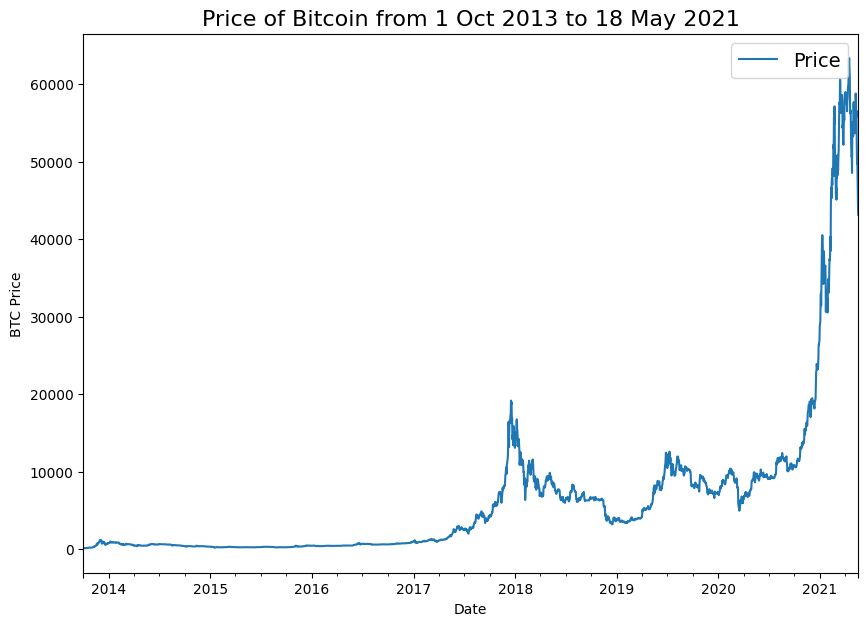

In [8]:
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021',
          fontsize=16)
plt.legend(fontsize=14)

## Importing Time Series Data with Python's CSV Module

In [9]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

In [10]:
timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
    csv_reader = csv.reader(f, delimiter=',')
    next(csv_reader) # skip first line (titles)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
        btc_price.append(float(line[2]))

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [11]:
# Plot from csv
import numpy as np

Text(0.5, 0, 'Date')

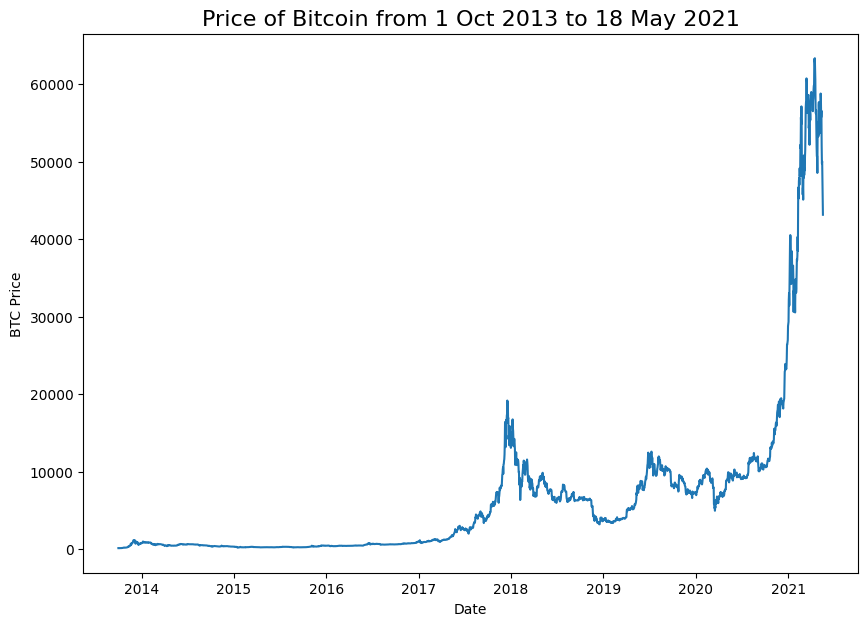

In [12]:
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021',
          fontsize=16)
plt.xlabel('Date')

## Format Data Part 1: Create Train and Test Sets with Time Series Data

### Creating Train and Test Sets with Time Series Data (Wrong Way)

In [13]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [14]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC Prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

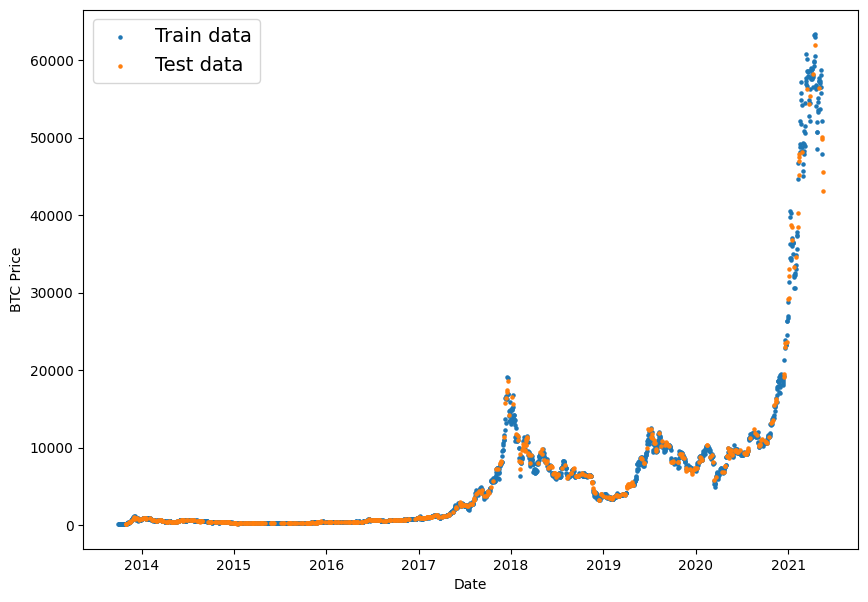

In [15]:
# Plotting wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show()

### Create Train and Test Sets for Time Series (The Right Way)

- Since the ideia of Time Series is to predict the future, the test set needs to contain samples **after** the train set.
- Train set represents the past
- Test set represents the pseudo future

In [16]:
# Create train and test splits
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits
X_test, y_test = timesteps[split_size:], prices[split_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

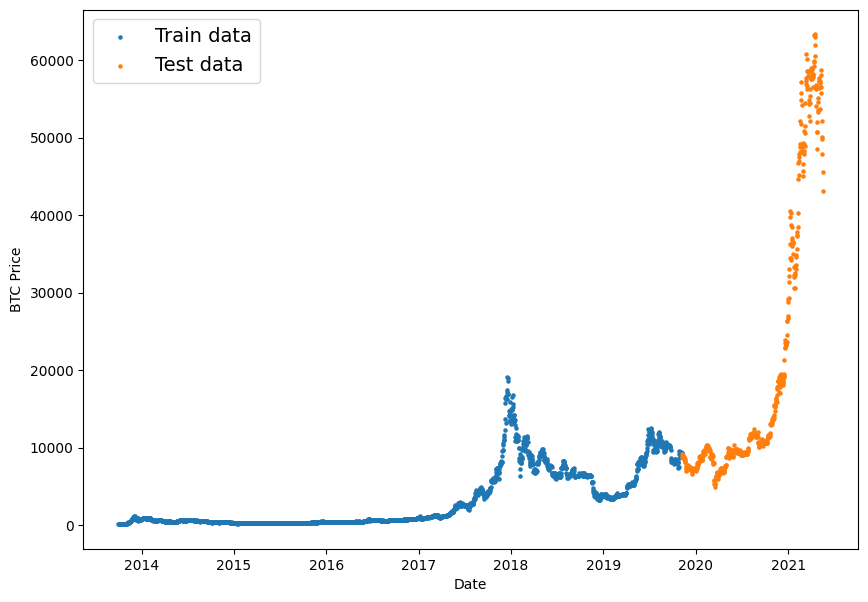

In [17]:
# Plotting wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show()

## Creating a Plotting Function

In [18]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, 
                     label=None):
    """
    Plots timesteps (a series of points in time) against values
    (a series of values across time)

    Parameters
    ----------
    timesteps: array of timestep values
    values: array of values across time
    format: style of plot, default '.'
    start: where to start the plot (setting a value will index from start of 
    timesteps and values)
    end: where to end the plot (similar to start but for the end)
    label: label to show on plot about values, default None
    """
    # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, 
             label=label)
    plt.xlabel('Time')
    plt.ylabel('BTC Price')
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

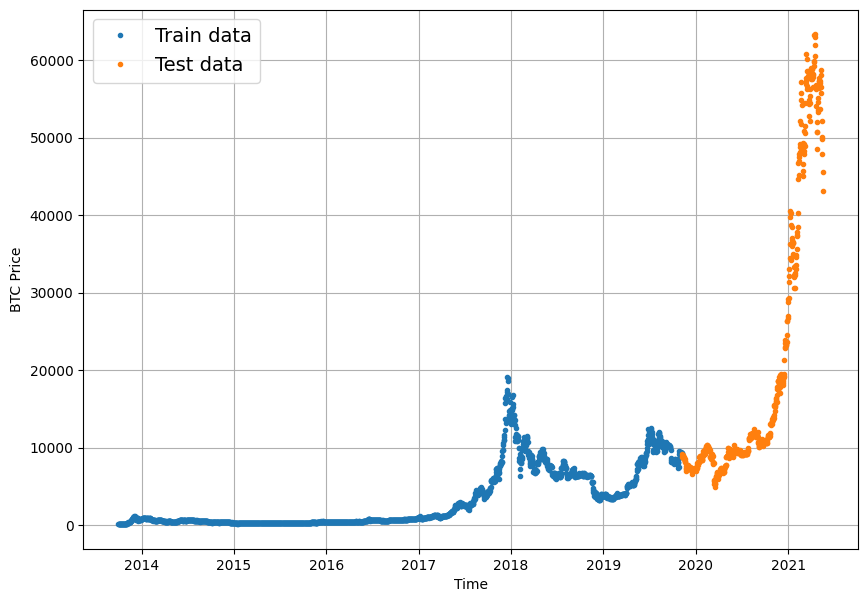

In [19]:
# Test the plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label='Train data')
plot_time_series(timesteps=X_test, values=y_test, label='Test data')

## Modelling Experiments

|Model Number|Model Type|Horizon|Window|
|:--:|:--|:--:|:--:|
|0|Naive Model (baseline)|-|-|
|1|Dense Model|1|7|
|2|Model 1 Modifications|1|30|
|3|Model 1 Modifications|7|30|
|4|Conv1D|1|7|
|5|LSTM|1|7|
|6|Same as 1 (but with multivariate data (block reward size)|1|7|
|7|N-BEATs Algorithm|1|7|
|8|Ensemble (multiple models on different loss functions)|1|7|
|9|Future prediction model|1|7|
|10|Same as 1 (but with turkey data)|1|7|

- **Horizon**: Number of timesteps into the future to be predicted
- **Window Size**: Number of timesteps to be used to predict horizon

## Model 0: Naive Forecast (Baseline)

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (ŷ) is equal to the value at timestep t-1 (previous timestep)

In [20]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [21]:
# Create a naive forecast
naive_forecast = y_test[:-1] # Does not get the last one
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

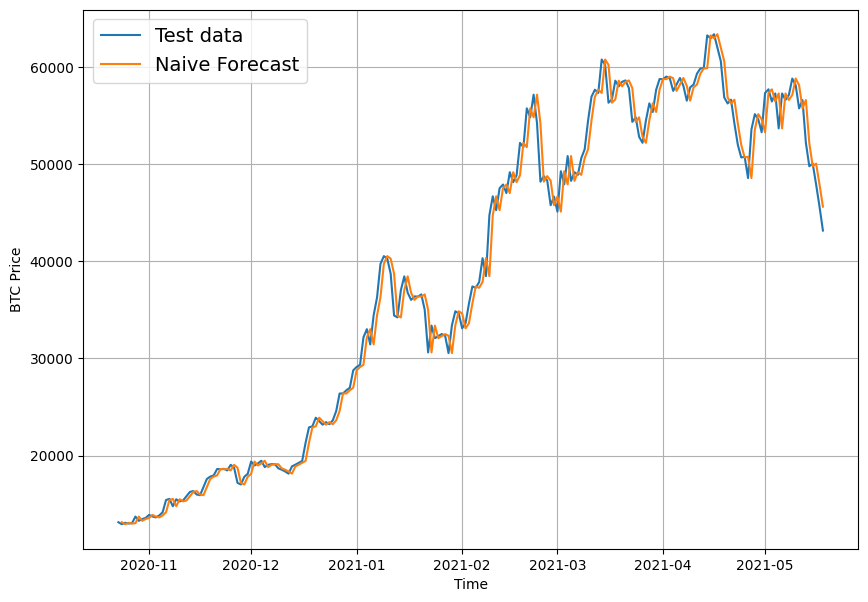

In [22]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train,
#                  label='Train data')
plot_time_series(timesteps=X_test, values=y_test, start=350, # zoom
                 format='-', label='Test data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350,
                 format='-', label='Naive Forecast')

## Evaluating a Time Series Model

In [23]:
import tensorflow as tf

In [24]:
# MASE Implementation
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming no seasonality of data)
    """
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Find MAE of naive forecast (no seasonality)
    # Seasonality is 1 day
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

    return mae / mae_naive_no_season

In [25]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [26]:
# Create a function to take in model predictions and truth 
# values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
    # Make sure float32 datatype
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [27]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Other Models to Use as a Baseline and for Forecasts

- Moving average	https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/
- ARIMA (Autoregression Integrated Moving Average)	https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
- sktime (Scikit-Learn for time series)	https://github.com/alan-turing-institute/sktime
- TensorFlow Decision Forests (random forest, gradient boosting trees)	https://www.tensorflow.org/decision_forests
- Facebook Kats (purpose-built forecasting and time series analysis library by Facebook)	https://github.com/facebookresearch/Kats
- LinkedIn Greykite (flexible, intuitive and fast forecasts)	https://github.com/linkedin/greykite

## Format Data Part 2: Windowing the Dataset

- Windowing the time series dataset to turn the data into a supervised learning problem

<br>

```
Windowing for one week:
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [28]:
y_train, len(y_train)

(array([ 123.65499   ,  125.455     ,  108.58483   , ..., 9369.62808116,
        9326.59962378, 9335.75240233]),
 2229)

In [29]:
print(f'Use this {btc_price[:7]} to predict this {btc_price[7]}')

Use this [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this 123.033


In [30]:
# Setup global variables for window and horizon size
HORIZON = 1 # Predict next 1 day
WINDOW_SIZE = 7 # Use the past week of Bitcoin data to make the prediction

In [31]:
# Create function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
    """
    Creates labels for windowed dataset.

    E.g. if horizon = 1
    Input: [0, 1, 2, 3, 4, 5, 6] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
    """
    return x[:, :-horizon], x[:, -horizon:] # Python Indexing

In [32]:
tf.expand_dims(tf.range(8)+1, axis=0)[:, :-1]

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [33]:
tf.expand_dims(tf.range(8)+1, axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [34]:
# Test the window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(
    tf.range(8)+1, axis=0))
print(f'Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}')

Window: [1 2 3 4 5 6 7] -> Label: 8


In [35]:
import numpy as np

In [36]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    """
    Turns a 1D array into a 2D array of sequential labelled windows of
    window_size with horizon size labels.
    """
    # 1. Create a window of specific window_size (add the horizon on 
    # the end for labelling later)
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

    # 2. Create a 2D array of multiple window steps (minus 1 to account 
    # for 0 indexing)
    window_indexes = window_step + np.expand_dims(
        np.arange(len(x) - (window_size + horizon - 1)), axis=0
    ).T

    print(f'Window indexes:\n {window_indexes, window_indexes.shape}')

    # 3. Index on the target array (a time series) with 2D array of 
    # multiple window steps
    windowed_array = x[window_indexes]
    # print(windowed_array)

    # 4. Get the labelled windows
    windows, labels = get_labelled_window(windowed_array, horizon=horizon)
    return windows, labels

In [37]:
full_windows, full_labels = make_windows(
    prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [38]:
# View the first 3 windows/labels
for i in range(3):
    print(f'Window: {full_windows[i]} -> Horizon: {full_labels[i]}')

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Horizon: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Horizon: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Horizon: [125.96116]


In [39]:
# View the last 3 windows/labels
for i in range(3):
    print(f'Window: {full_windows[i-3]} -> Horizon: {full_labels[i-3]}')

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Horizon: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Horizon: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Horizon: [43144.47129086]


## Turning Windows into Training and Test Sets

In [40]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    """
    Splits matching pairs of windows and labels into train and 
    test splits.
    """
    # This will default to 80% train / 20% test
    split_size = int(len(windows) * (1 - test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [41]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    full_windows, full_labels
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [42]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [43]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

## Make a Modelling Checkpoint

In [44]:
import os

In [45]:
# Create a function to implement a ModelCheckpoint callback with a specific
# filename
def create_model_checkpoint(model_name, save_path='model_experiments'):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name), 
        verbose=0,
        save_best_only=True
    )

## Model 1: Dense Model (window = 7, horizon = 1)

In [46]:
import tensorflow as tf
from keras import layers

In [47]:
# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Constuct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_1_dense')

# 2. Compile
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 1:19 - loss: 4367.0894 - mae: 4367.0894 - mse: 39143264.0000

18/18 [==============================] - 6s 62ms/step - loss: 2333.0781 - mae: 2333.0781 - mse: 15438390.0000 - val_loss: 2850.3003 - val_mae: 2850.3003 - val_mse: 16275622.0000
Epoch 2/100
13/18 [====================>.........] - ETA: 0s - loss: 383.3530 - mae: 383.3530 - mse: 511511.1562

18/18 [==============================] - 1s 48ms/step - loss: 341.4923 - mae: 341.4923 - mse: 431677.3438 - val_loss: 1315.6306 - val_mae: 1315.6306 - val_mse: 4429512.0000
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 217.0579 - mae: 217.0579 - mse: 213807.2188

18/18 [==============================] - 1s 45ms/step - loss: 213.0806 - mae: 213.0806 - mse: 211690.6094 - val_loss: 957.4379 - val_mae: 957.4379 - val_mse: 2973118.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 213.7871 - mae: 213.7871 - mse: 232692.0000

18/18 [==============================] - 1s 31ms/step - loss: 172.0033 - mae: 172.0033 - mse: 154878.2031 - val_loss: 941.9620 - val_mae: 941.9620 - val_mse: 2878942.2500
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 167.6611 - mae: 167.6611 - mse: 152637.0781

18/18 [==============================] - 1s 30ms/step - loss: 167.6611 - mae: 167.6611 - mse: 152637.0781 - val_loss: 940.9802 - val_mae: 940.9802 - val_mse: 2791883.5000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 122.7742 - mae: 122.7742 - mse: 60206.0469

18/18 [==============================] - 1s 30ms/step - loss: 162.6314 - mae: 162.6314 - mse: 142958.9219 - val_loss: 900.5829 - val_mae: 900.5829 - val_mse: 2702661.0000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 198.1889 - mae: 198.1889 - mse: 285731.8750

18/18 [==============================] - 1s 32ms/step - loss: 157.8089 - mae: 157.8089 - mse: 136672.7812 - val_loss: 875.1653 - val_mae: 875.1653 - val_mse: 2504391.5000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 129.8408 - mae: 129.8408 - mse: 70232.7578

18/18 [==============================] - 1s 31ms/step - loss: 155.9135 - mae: 155.9135 - mse: 132133.0625 - val_loss: 856.8740 - val_mae: 856.8740 - val_mse: 2427991.7500
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 153.2390 - mae: 153.2390 - mse: 130282.3906 - val_loss: 878.0475 - val_mae: 878.0475 - val_mse: 2408388.2500
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 163.2049 - mae: 163.2049 - mse: 179148.5000

18/18 [==============================] - 1s 31ms/step - loss: 150.8490 - mae: 150.8490 - mse: 125475.2266 - val_loss: 828.3967 - val_mae: 828.3967 - val_mse: 2267809.2500
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 156.2288 - mae: 156.2288 - mse: 114356.3125

18/18 [==============================] - 1s 31ms/step - loss: 147.9008 - mae: 147.9008 - mse: 120544.2188 - val_loss: 817.4960 - val_mae: 817.4960 - val_mse: 2190131.0000
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 145.0715 - mae: 145.0715 - mse: 116913.5391 - val_loss: 862.0056 - val_mae: 862.0056 - val_mse: 2249746.2500
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 144.9082 - mae: 144.9082 - mse: 117412.8672 - val_loss: 832.2053 - val_mae: 832.2053 - val_mse: 2137595.7500
Epoch 14/100
15/18 [========================>.....] - ETA: 0s - loss: 139.5385 - mae: 139.5385 - mse: 111146.9219

18/18 [==============================] - 1s 45ms/step - loss: 141.0332 - mae: 141.0332 - mse: 111124.4141 - val_loss: 799.6285 - val_mae: 799.6285 - val_mse: 2024236.2500
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 141.7245 - mae: 141.7245 - mse: 74822.4297

18/18 [==============================] - 1s 30ms/step - loss: 140.3977 - mae: 140.3977 - mse: 109220.9531 - val_loss: 786.9424 - val_mae: 786.9424 - val_mse: 1962653.8750
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 137.0771 - mae: 137.0771 - mse: 105057.8438 - val_loss: 792.5453 - val_mae: 792.5453 - val_mse: 1947482.2500
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 135.9219 - mae: 135.9219 - mse: 103289.1094 - val_loss: 791.2185 - val_mae: 791.2185 - val_mse: 1922040.7500
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 148.1485 - mae: 148.1485 - mse: 109864.9219

18/18 [==============================] - 1s 30ms/step - loss: 136.5332 - mae: 136.5332 - mse: 104470.1953 - val_loss: 738.7712 - val_mae: 738.7712 - val_mse: 1779389.8750
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 78.8552 - mae: 78.8552 - mse: 36738.7070

18/18 [==============================] - 1s 30ms/step - loss: 132.7237 - mae: 132.7237 - mse: 99245.8672 - val_loss: 735.7686 - val_mae: 735.7686 - val_mse: 1749504.2500
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 133.7139 - mae: 133.7139 - mse: 101477.0781 - val_loss: 744.2688 - val_mae: 744.2688 - val_mse: 1849733.8750
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 170.8204 - mae: 170.8204 - mse: 125740.5312

18/18 [==============================] - 1s 31ms/step - loss: 134.5459 - mae: 134.5459 - mse: 100993.1484 - val_loss: 702.5865 - val_mae: 702.5865 - val_mse: 1660974.7500
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 180.1902 - mae: 180.1902 - mse: 188266.6406

18/18 [==============================] - 1s 31ms/step - loss: 130.3055 - mae: 130.3055 - mse: 96145.9922 - val_loss: 694.7396 - val_mae: 694.7396 - val_mse: 1615687.8750
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 127.7328 - mae: 127.7328 - mse: 92987.8828 - val_loss: 695.1764 - val_mae: 695.1764 - val_mse: 1594464.5000
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 142.6405 - mae: 142.6405 - mse: 96244.3281

18/18 [==============================] - 1s 31ms/step - loss: 126.5142 - mae: 126.5142 - mse: 91289.9141 - val_loss: 682.3611 - val_mae: 682.3611 - val_mse: 1583523.0000
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 130.8756 - mae: 130.8756 - mse: 68190.6953

18/18 [==============================] - 1s 32ms/step - loss: 125.4522 - mae: 125.4522 - mse: 88751.2656 - val_loss: 679.0808 - val_mae: 679.0808 - val_mse: 1571772.8750
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 130.0894 - mae: 130.0894 - mse: 90946.6797 - val_loss: 702.5324 - val_mae: 702.5324 - val_mse: 1656605.0000
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 189.0711 - mae: 189.0711 - mse: 163176.4844

18/18 [==============================] - 1s 30ms/step - loss: 127.6474 - mae: 127.6474 - mse: 90633.7266 - val_loss: 673.3995 - val_mae: 673.3995 - val_mse: 1553640.2500
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 128.3332 - mae: 128.3332 - mse: 82510.7500

18/18 [==============================] - 1s 36ms/step - loss: 123.7581 - mae: 123.7581 - mse: 86719.0625 - val_loss: 653.5578 - val_mae: 653.5578 - val_mse: 1454673.2500
Epoch 29/100
18/18 [==============================] - 0s 8ms/step - loss: 124.3808 - mae: 124.3808 - mse: 88209.7734 - val_loss: 714.0454 - val_mae: 714.0454 - val_mse: 1582592.3750
Epoch 30/100
18/18 [==============================] - 0s 10ms/step - loss: 129.0475 - mae: 129.0475 - mse: 89962.0234 - val_loss: 793.2560 - val_mae: 793.2560 - val_mse: 1806737.1250
Epoch 31/100
18/18 [==============================] - 0s 8ms/step - loss: 136.1350 - mae: 136.1350 - mse: 96428.6328 - val_loss: 790.2736 - val_mae: 790.2736 - val_mse: 1793445.7500
Epoch 32/100
18/18 [==============================] - 0s 10ms/step - loss: 128.0906 - mae: 128.0906 - mse: 87136.5312 - val_loss: 696.9675 - val_mae: 696.9675 - val_mse: 1525074.0000
Epoch 33/100
12/18 [===================>..........] - ETA: 0s - loss: 123.5047 - mae: 123.5047 - mse

18/18 [==============================] - 1s 51ms/step - loss: 123.1242 - mae: 123.1242 - mse: 80644.4609 - val_loss: 648.8940 - val_mae: 648.8940 - val_mse: 1404755.0000
Epoch 34/100
11/18 [=================>............] - ETA: 0s - loss: 124.6542 - mae: 124.6542 - mse: 93224.1875 

18/18 [==============================] - 1s 60ms/step - loss: 119.9760 - mae: 119.9760 - mse: 83133.9531 - val_loss: 636.2144 - val_mae: 636.2144 - val_mse: 1374227.1250
Epoch 35/100
11/18 [=================>............] - ETA: 0s - loss: 122.5227 - mae: 122.5227 - mse: 85538.3594

18/18 [==============================] - 1s 53ms/step - loss: 118.2213 - mae: 118.2213 - mse: 82360.5156 - val_loss: 627.4788 - val_mae: 627.4788 - val_mse: 1354102.1250
Epoch 36/100
18/18 [==============================] - 0s 7ms/step - loss: 124.7467 - mae: 124.7467 - mse: 83318.2891 - val_loss: 689.8178 - val_mae: 689.8178 - val_mse: 1494683.6250
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 153.9825 - mae: 153.9825 - mse: 129428.1641

18/18 [==============================] - 1s 31ms/step - loss: 120.5703 - mae: 120.5703 - mse: 82573.1719 - val_loss: 618.7415 - val_mae: 618.7415 - val_mse: 1335587.5000
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 103.8314 - mae: 103.8314 - mse: 67142.8594

18/18 [==============================] - 1s 30ms/step - loss: 116.1638 - mae: 116.1638 - mse: 79928.6719 - val_loss: 615.5314 - val_mae: 615.5314 - val_mse: 1318472.1250
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 115.0564 - mae: 115.0564 - mse: 78831.9531 - val_loss: 619.0667 - val_mae: 619.0667 - val_mse: 1333509.7500
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 105.5144 - mae: 105.5144 - mse: 104887.9531

18/18 [==============================] - 1s 45ms/step - loss: 114.3611 - mae: 114.3611 - mse: 77737.4062 - val_loss: 610.3386 - val_mae: 610.3386 - val_mse: 1306347.6250
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 115.4791 - mae: 115.4791 - mse: 78099.5078 - val_loss: 630.4120 - val_mae: 630.4120 - val_mse: 1360917.1250
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 106.4973 - mae: 106.4973 - mse: 59641.2266

18/18 [==============================] - 1s 29ms/step - loss: 117.3636 - mae: 117.3636 - mse: 79771.3906 - val_loss: 606.7077 - val_mae: 606.7077 - val_mse: 1282135.2500
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4145 - mae: 114.4145 - mse: 75865.2500 - val_loss: 616.4089 - val_mae: 616.4089 - val_mse: 1316059.2500
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 116.9962 - mae: 116.9962 - mse: 77981.8984 - val_loss: 671.6384 - val_mae: 671.6384 - val_mse: 1465758.8750
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 117.6202 - mae: 117.6202 - mse: 80466.8828 - val_loss: 611.2309 - val_mae: 611.2309 - val_mse: 1282551.0000
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 86.1155 - mae: 86.1155 - mse: 50100.1719

18/18 [==============================] - 1s 30ms/step - loss: 115.0102 - mae: 115.0102 - mse: 77585.3125 - val_loss: 605.3512 - val_mae: 605.3512 - val_mse: 1267864.3750
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2717 - mae: 112.2717 - mse: 76457.9688 - val_loss: 642.6642 - val_mae: 642.6642 - val_mse: 1348511.3750
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8083 - mae: 112.8083 - mse: 75153.2578 - val_loss: 631.4246 - val_mae: 631.4246 - val_mse: 1321547.0000
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 166.3142 - mae: 166.3142 - mse: 114668.5938

18/18 [==============================] - 1s 31ms/step - loss: 123.1971 - mae: 123.1971 - mse: 79932.7734 - val_loss: 594.0224 - val_mae: 594.0224 - val_mse: 1243157.1250
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4066 - mae: 112.4066 - mse: 76595.2969 - val_loss: 636.4911 - val_mae: 636.4911 - val_mse: 1357362.6250
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6314 - mae: 112.6314 - mse: 75568.1250 - val_loss: 624.3475 - val_mae: 624.3475 - val_mse: 1299226.8750
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8608 - mae: 113.8608 - mse: 77009.3438 - val_loss: 600.1127 - val_mae: 600.1127 - val_mse: 1261955.7500
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9746 - mae: 114.9746 - mse: 76865.2344 - val_loss: 620.6265 - val_mae: 620.6265 - val_mse: 1288831.0000
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 118.8408 - mae: 118.8408 - m

18/18 [==============================] - 1s 31ms/step - loss: 111.2882 - mae: 111.2882 - mse: 73539.9688 - val_loss: 582.3723 - val_mae: 582.3723 - val_mse: 1210758.7500
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4523 - mae: 110.4523 - mse: 72892.8906 - val_loss: 618.2866 - val_mae: 618.2866 - val_mse: 1276103.1250
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 111.5047 - mae: 111.5047 - mse: 74271.5547 - val_loss: 586.1275 - val_mae: 586.1275 - val_mse: 1208738.0000
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 73.2516 - mae: 73.2516 - mse: 34463.5352

18/18 [==============================] - 1s 31ms/step - loss: 109.1393 - mae: 109.1393 - mse: 71901.2656 - val_loss: 579.9177 - val_mae: 579.9177 - val_mse: 1202413.0000
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 111.4831 - mae: 111.4831 - mse: 73866.9062 - val_loss: 638.6041 - val_mae: 638.6041 - val_mse: 1316843.0000
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7085 - mae: 113.7085 - mse: 74786.8203 - val_loss: 655.2234 - val_mae: 655.2234 - val_mse: 1353193.7500
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 114.7206 - mae: 114.7206 - mse: 75896.7344 - val_loss: 582.0649 - val_mae: 582.0649 - val_mse: 1198665.8750
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9207 - mae: 112.9207 - mse: 73036.1641 - val_loss: 590.3566 - val_mae: 590.3566 - val_mse: 1225376.2500
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8212 - mae: 108.8212 - m

18/18 [==============================] - 1s 30ms/step - loss: 109.1027 - mae: 109.1027 - mse: 71972.1328 - val_loss: 574.4946 - val_mae: 574.4946 - val_mse: 1186926.2500
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 111.0534 - mae: 111.0534 - mse: 72655.4688 - val_loss: 620.1796 - val_mae: 620.1796 - val_mse: 1287626.3750
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 167.8230 - mae: 167.8230 - mse: 173458.7031

18/18 [==============================] - 1s 32ms/step - loss: 108.2466 - mae: 108.2466 - mse: 71679.0000 - val_loss: 574.0725 - val_mae: 574.0725 - val_mse: 1180829.8750
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1084 - mae: 109.1084 - mse: 71205.8281 - val_loss: 591.2979 - val_mae: 591.2979 - val_mse: 1208515.0000
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4812 - mae: 111.4812 - mse: 73636.5547 - val_loss: 581.9519 - val_mae: 581.9519 - val_mse: 1201995.8750
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 84.1453 - mae: 84.1453 - mse: 65433.6953

18/18 [==============================] - 1s 31ms/step - loss: 107.7217 - mae: 107.7217 - mse: 70411.6328 - val_loss: 571.9125 - val_mae: 571.9125 - val_mse: 1178252.5000
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 102.8233 - mae: 102.8233 - mse: 48576.9141

18/18 [==============================] - 1s 35ms/step - loss: 110.7483 - mae: 110.7483 - mse: 71843.6719 - val_loss: 571.3853 - val_mae: 571.3853 - val_mse: 1177096.7500
Epoch 79/100
18/18 [==============================] - 0s 8ms/step - loss: 110.2735 - mae: 110.2735 - mse: 74461.6719 - val_loss: 603.4238 - val_mae: 603.4238 - val_mse: 1244500.6250
Epoch 80/100
18/18 [==============================] - 0s 8ms/step - loss: 108.4260 - mae: 108.4260 - mse: 71749.3047 - val_loss: 603.0873 - val_mae: 603.0873 - val_mse: 1229165.1250
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 108.2905 - mae: 108.2905 - mse: 71161.4375 - val_loss: 586.7109 - val_mae: 586.7109 - val_mse: 1209195.7500
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 116.1990 - mae: 116.1990 - mse: 77207.7266 - val_loss: 576.3443 - val_mae: 576.3443 - val_mse: 1188411.6250
Epoch 83/100
18/18 [==============================] - 0s 10ms/step - loss: 111.2432 - mae: 111.2432 - 

18/18 [==============================] - 1s 44ms/step - loss: 111.4685 - mae: 111.4685 - mse: 72474.1094 - val_loss: 569.4603 - val_mae: 569.4603 - val_mse: 1171024.3750
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 108.3677 - mae: 108.3677 - mse: 71575.6719 - val_loss: 587.4355 - val_mae: 587.4355 - val_mse: 1194985.5000
Epoch 86/100
18/18 [==============================] - 0s 8ms/step - loss: 109.4643 - mae: 109.4643 - mse: 70662.0469 - val_loss: 607.8173 - val_mae: 607.8173 - val_mse: 1235679.1250
Epoch 87/100
18/18 [==============================] - 0s 7ms/step - loss: 107.0477 - mae: 107.0477 - mse: 69183.3125 - val_loss: 588.8424 - val_mae: 588.8424 - val_mse: 1209750.7500
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2858 - mae: 108.2858 - mse: 71375.4609 - val_loss: 580.3923 - val_mae: 580.3923 - val_mse: 1195075.3750
Epoch 89/100
 1/18 [>.............................] - ETA: 0s - loss: 102.7382 - mae: 102.7382 - mse: 

18/18 [==============================] - 1s 31ms/step - loss: 107.5001 - mae: 107.5001 - mse: 70290.6953 - val_loss: 568.2828 - val_mae: 568.2828 - val_mse: 1163562.7500
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8137 - mae: 107.8137 - mse: 68484.7266 - val_loss: 599.3662 - val_mae: 599.3662 - val_mse: 1216711.7500
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3579 - mae: 115.3579 - mse: 75077.3672 - val_loss: 612.0353 - val_mae: 612.0353 - val_mse: 1259763.1250
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7186 - mae: 109.7186 - mse: 72521.4688 - val_loss: 569.0345 - val_mae: 569.0345 - val_mse: 1169680.2500
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 113.2346 - mae: 113.2346 - mse: 73114.1250 - val_loss: 600.0660 - val_mae: 600.0660 - val_mse: 1234685.2500
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6378 - mae: 110.6378 - m

18/18 [==============================] - 1s 32ms/step - loss: 108.7491 - mae: 108.7491 - mse: 70332.1406 - val_loss: 566.3928 - val_mae: 566.3928 - val_mse: 1162054.2500
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 153.0957 - mae: 153.0957 - mse: 136456.9688

18/18 [==============================] - 1s 45ms/step - loss: 107.2211 - mae: 107.2211 - mse: 70499.0859 - val_loss: 566.0848 - val_mae: 566.0848 - val_mse: 1157405.5000
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9216 - mae: 112.9216 - mse: 71357.9375 - val_loss: 696.4061 - val_mae: 696.4061 - val_mse: 1440023.0000


In [48]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 696.4061 - mae: 696.4061 - mse: 1440023.2500


[696.4061279296875, 696.4061279296875, 1440023.25]

In [49]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 566.0848 - mae: 566.0848 - mse: 1157405.1250


[566.0847778320312, 566.0847778320312, 1157405.125]

## Making Forecast with a Model (on the test dataset)

In [50]:
def make_preds(model, input_data):
    """
    Uses model to make predictions input_data
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # returns 1D array of predictions

In [51]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8854.29  , 8768.799 , 8987.234 , 8789.148 , 8764.971 , 8699.2705,
        8674.314 , 8529.734 , 8444.957 , 8508.705 ], dtype=float32)>)

In [52]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 566.08484,
 'mse': 1157405.2,
 'rmse': 1075.8278,
 'mape': 2.5396178,
 'mase': 0.99445426}

In [53]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

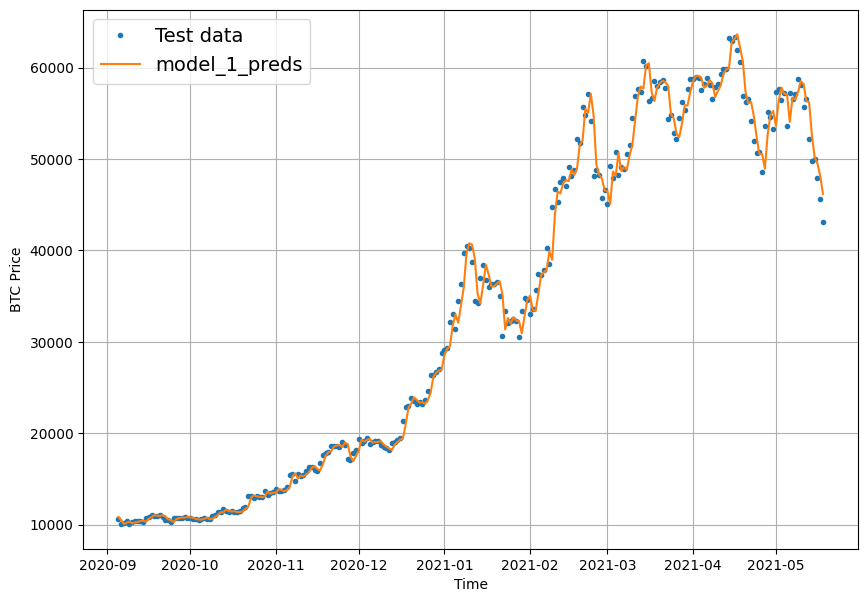

In [54]:
# Plotting model 1 predictions
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels
# to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0],
                 start=offset,
                 label='Test data')

plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=model_1_preds,
                 start=offset,
                 format='-',
                 label='model_1_preds')

## Model 2: Dense(window = 30, horizon = 1)

In [55]:
HORIZON = 1 # Predict one step at a time
WINDOW_SIZE = 30 # timesteps in past

In [56]:
# Make window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(
    prices,
    window_size=WINDOW_SIZE,
    horizon=HORIZON
)
len(full_windows), len(full_labels)

Window indexes:
 (array([[   0,    1,    2, ...,   28,   29,   30],
       [   1,    2,    3, ...,   29,   30,   31],
       [   2,    3,    4, ...,   30,   31,   32],
       ...,
       [2754, 2755, 2756, ..., 2782, 2783, 2784],
       [2755, 2756, 2757, ..., 2783, 2784, 2785],
       [2756, 2757, 2758, ..., 2784, 2785, 2786]]), (2757, 31))


(2757, 2757)

In [57]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows=full_windows,
    labels=full_labels,
    test_split=0.2
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [58]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_2_dense')

# Compile
model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [59]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 600.5946 - mae: 600.5946


[600.5946044921875, 600.5946044921875]

In [60]:
# Load in the best performing model
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 600.5946 - mae: 600.5946


[600.5946044921875, 600.5946044921875]

In [61]:
# Get forecast predictions
model_2_preds = make_preds(model_2, input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [62]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 600.59467,
 'mse': 1267467.1,
 'rmse': 1125.8184,
 'mape': 2.7148616,
 'mase': 1.0498453}

In [63]:
model_1_results

{'mae': 566.08484,
 'mse': 1157405.2,
 'rmse': 1075.8278,
 'mape': 2.5396178,
 'mase': 0.99445426}

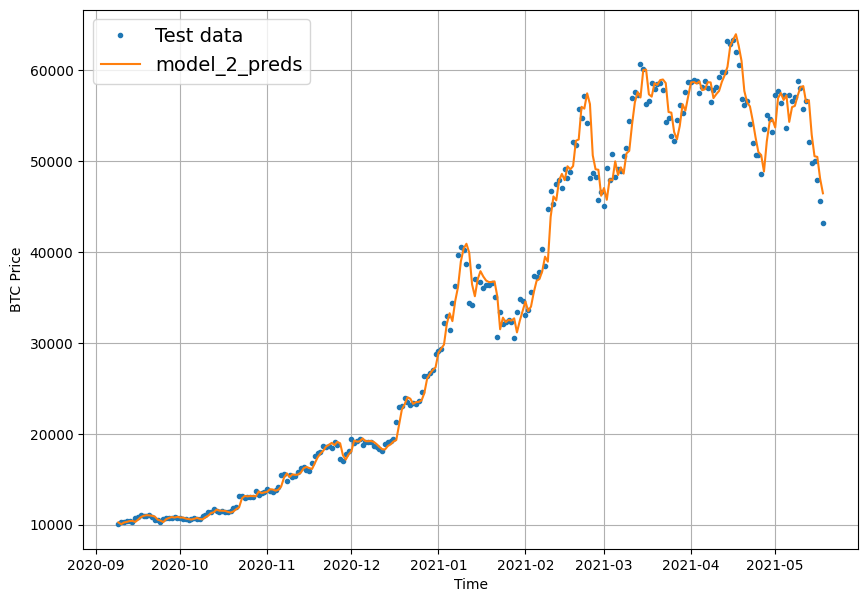

In [64]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0],
                 start=offset,
                 label='Test data')

plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=model_2_preds,
                 start=offset,
                 format='-',
                 label='model_2_preds')

## Model 3: Dense (window = 30, horizon = 7)

In [65]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels, make_windows(prices, 
                                        window_size=WINDOW_SIZE,
                                        horizon=HORIZON)
len(full_windows), len(full_labels)

Window indexes:
 (array([[   0,    1,    2, ...,   34,   35,   36],
       [   1,    2,    3, ...,   35,   36,   37],
       [   2,    3,    4, ...,   36,   37,   38],
       ...,
       [2748, 2749, 2750, ..., 2782, 2783, 2784],
       [2749, 2750, 2751, ..., 2783, 2784, 2785],
       [2750, 2751, 2752, ..., 2784, 2785, 2786]]), (2751, 37))


(2757, 2757)

In [66]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows=full_windows,
    labels=full_labels
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [67]:
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_3_dense')

# Compile
model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit the model
model_3.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [68]:
# Evaluate the model
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 9ms/step - loss: 658.2552 - mae: 658.2552


[658.2552490234375, 658.2552490234375]

In [69]:
# Load best version of model 3 and evaluate
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense/')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 641.9986 - mae: 641.9986


[641.9985961914062, 641.9985961914062]

In [70]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[8689.739, 8779.924, 8759.993, 8626.984, 8790.134, 8658.47 ,
        8843.934],
       [8857.489, 8889.04 , 8834.847, 8743.27 , 8850.211, 8987.045,
        8928.715],
       [8922.701, 8843.452, 8781.463, 8627.273, 8734.278, 8940.999,
        8766.627],
       [8640.557, 8609.639, 8560.568, 8575.957, 8487.964, 8603.34 ,
        8507.177],
       [8378.971, 8353.754, 8390.996, 8430.081, 8319.374, 8402.919,
        8266.178]], dtype=float32)>

In [71]:
test_labels.shape, model_3_preds.shape

((552, 1), TensorShape([552, 7]))

In [72]:
# Evaluate model_3 results
model_3_results = evaluate_preds(y_true=test_labels,
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  64.1815  ,  213.11732 ,  301.75558 ,  100.05371 ,  174.15807 ,
         156.94197 ,   53.5339  ,   76.96254 ,  501.64648 ,  546.2911  ,
         104.18834 ,  253.02867 ,   91.691055,   80.44664 ,  449.29703 ,
         110.84794 ,  341.4232  ,   29.416992,  234.35023 ,   85.610634,
          45.9458  ,   87.85247 ,  213.59654 ,  187.95174 ,  109.73409 ,
          66.20612 ,  161.6686  ,  155.88205 ,   52.07373 ,   60.410503,
          80.267784,  133.44113 ,   31.796665,  250.46902 ,  424.6686  ,
         763.60516 ,   71.50879 ,   31.399136,  279.54965 ,   44.947334,
          65.261856,   54.62235 ,   39.1423  ,   78.84647 ,   42.41546 ,
         187.3164  ,  145.07596 ,   79.641396,   81.5233  ,   29.089006,
         238.73283 ,  295.66733 ,  222.51633 ,   82.53425 ,  431.97916 ,
         393.92892 ,  103.85491 ,  253.05086 ,  129.6845  ,   83.2018  ,
          67.81048 ,   40.771343,  575.4882  ,  341.34906 ,  152.29408 ,
         148.29549 ,   33.29827 ,  359.58817

### Make the Evaluation Function Work for Larger Horizons

In [73]:
print(model_3_results['mae'].shape, model_3_results['mae'].ndim)
print(model_2_results['mae'].shape, model_2_results['mae'].ndim)

(552,) 1
() 0


In [74]:
# Create a function to take in model predictions and truth 
# values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
    # Make sure float32 datatype
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # Account for different sized metrics (for longer horizons, 
    # reduce metrics to a single value)
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [75]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=test_labels,
                                 y_pred=model_3_preds)
model_3_results

{'mae': 641.9986,
 'mse': 1394568.0,
 'rmse': 663.4671,
 'mape': 2.9028168,
 'mase': 1.1222199}

In [76]:
model_2_results

{'mae': 600.59467,
 'mse': 1267467.1,
 'rmse': 1125.8184,
 'mape': 2.7148616,
 'mase': 1.0498453}

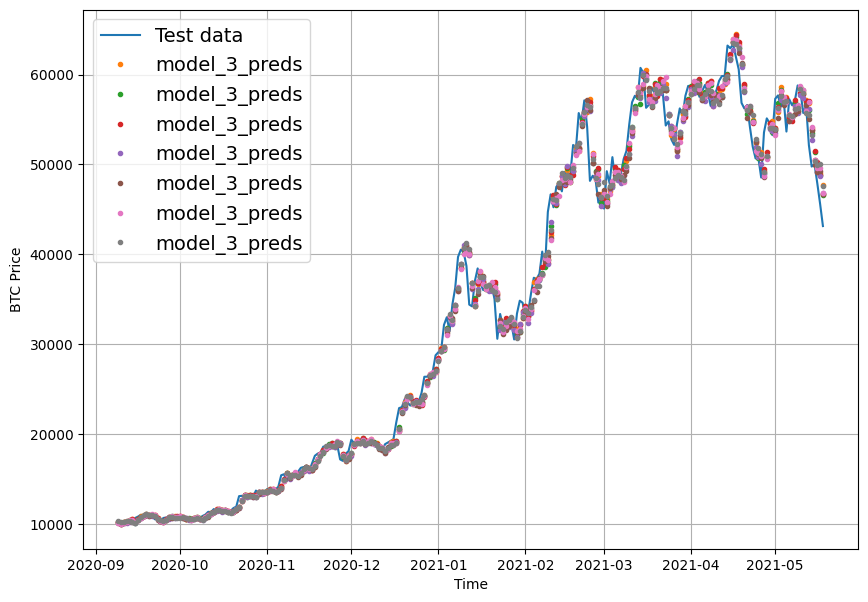

In [77]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], start=offset,
                 format='-',
                 label='Test data')

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_3_preds, start=offset,
                 label='model_3_preds')

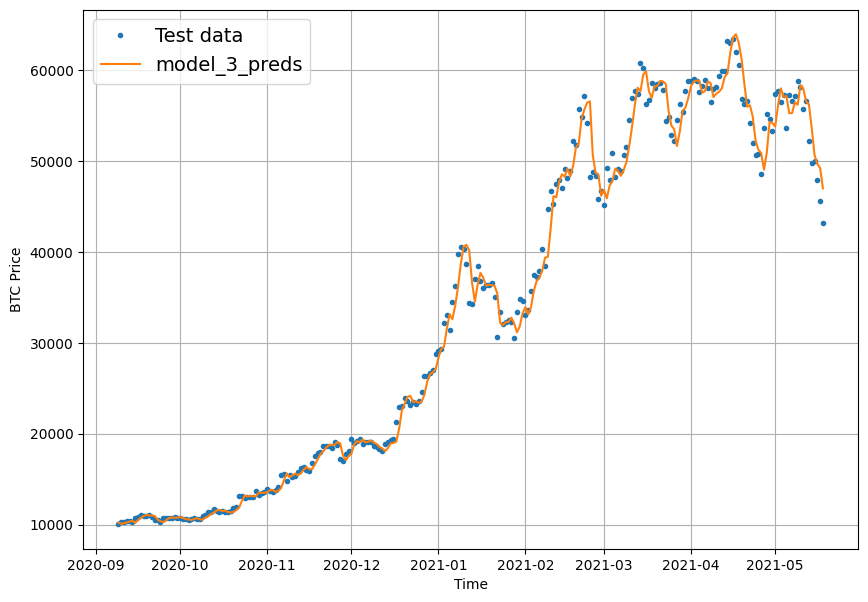

In [78]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], start=offset,
                 label='Test data')

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset,
                 format='-',
                 label='model_3_preds')

## Which of the Models is Performing the Best so Far?

<Axes: >

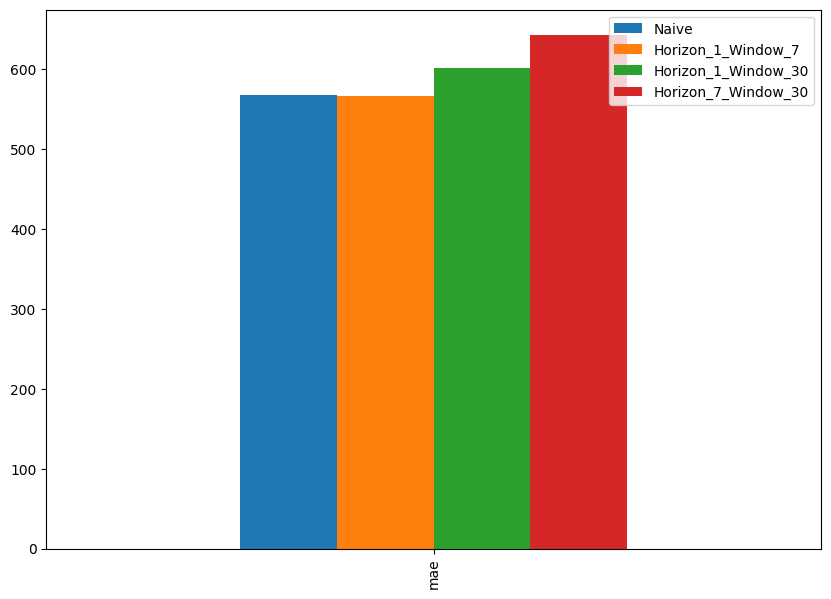

In [79]:
pd.DataFrame({'Naive': naive_results['mae'],
              'Horizon_1_Window_7': model_1_results['mae'],
              'Horizon_1_Window_30': model_2_results['mae'],
              'Horizon_7_Window_30': model_3_results['mae']
              }, index=['mae']
             ).plot(figsize=(10, 7), kind='bar')

## Model 4: Conv1D

In [80]:
HORIZON = 1 # Predict next day of bitcoin prices
WINDOW_SIZE = 7 # Use previous week worth data

In [81]:
# Create windowed data
full_windows, full_labels = make_windows(prices, 
                                        window_size=WINDOW_SIZE,
                                        horizon=HORIZON)
len(full_windows), len(full_labels)

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [82]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    full_windows, full_labels
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [83]:
# Check data input shape
train_windows[0].shape  # Returns (WINDOW_SIZE,)

(7,)

In [84]:
# Before passing the data to the Conv1D layer, reshape is needed
# in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [85]:
# Add an extra dimension to input_dim
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [86]:
# Test out the lambda layer
print(f'Original Shape: {x.shape}')
print(f'Expanded Shape: {expand_dims_layer(x).shape}')
print(f'Original values with expanded shape:\n {expand_dims_layer(x)}')

Original Shape: (7,)
Expanded Shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [87]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=7, padding='causal',
                  activation='relu'),
    layers.Dense(HORIZON),
], name='model_4_conv1D')

# Compile model
model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [88]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [89]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 617.8478


617.8477783203125

In [90]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model('model_experiments/model_4_conv1D')
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 569.9651


569.965087890625

In [91]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8892.023 , 8787.39  , 9020.977 , 8798.029 , 8742.048 , 8759.8545,
       8685.264 , 8537.773 , 8473.177 , 8528.186 ], dtype=float32)>

In [92]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 569.9651,
 'mse': 1179679.2,
 'rmse': 1086.1304,
 'mape': 2.559159,
 'mase': 1.0012708}

In [93]:
model_3_results

{'mae': 641.9986,
 'mse': 1394568.0,
 'rmse': 663.4671,
 'mape': 2.9028168,
 'mase': 1.1222199}

## Model 5: RNN (LSTM)

In [94]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, return_sequences=True, activation='relu')(x)
x = layers.LSTM(128, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
output = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs=inputs, outputs=output, name='model_5_lstm')

# Compile
model_5.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 8s 235ms/step - loss: 2729.5811 - val_loss: 13311.8691
Epoch 2/100
18/18 [==============================] - 3s 191ms/step - loss: 971.6612 - val_loss: 3057.7488
Epoch 3/100
18/18 [==============================] - 4s 260ms/step - loss: 278.2479 - val_loss: 1244.4312
Epoch 4/100
18/18 [==============================] - 3s 190ms/step - loss: 212.1740 - val_loss: 1092.6472
Epoch 5/100
18/18 [==============================] - 4s 220ms/step - loss: 186.9919 - val_loss: 1033.2863
Epoch 6/100
18/18 [==============================] - 4s 209ms/step - loss: 180.6994 - val_loss: 1013.9589
Epoch 7/100
18/18 [==============================] - 4s 217ms/step - loss: 178.5527 - val_loss: 955.0894
Epoch 8/100
18/18 [==============================] - 0s 11ms/step - loss: 178.0512 - val_loss: 1014.6748
Epoch 9/100
18/18 [==============================] - 0s 11ms/step - loss: 186.4162 - val_loss: 1058.1678
Epoch 10/100
18/18 [===========================

In [95]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model('model_experiments/model_5_lstm')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 566.5594


566.5593872070312

In [96]:
# Make predictions with the LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8864.643, 8822.036, 9066.876, 8783.717, 8753.737], dtype=float32)>

In [97]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 566.5594,
 'mse': 1162851.6,
 'rmse': 1078.356,
 'mape': 2.5364537,
 'mase': 0.9952879}

In [98]:
model_1_results

{'mae': 566.08484,
 'mse': 1157405.2,
 'rmse': 1075.8278,
 'mape': 2.5396178,
 'mase': 0.99445426}

## Making a Multivariate Time Series Dataset

- A second feature should be added to the dataset that could potentially influence the price of Bitcoin: **Bitcoin Halving Events (Block Reward)**

In [99]:
# Multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [100]:
# Adding block reward to the dataset
block_reward_1 = 50 # 3 January 2009 - isn't in the dataset
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')

In [101]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [102]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

# Add in block_reward values as a feature to the dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[
    block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [103]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [104]:
from sklearn.preprocessing import minmax_scale

<Axes: xlabel='Date'>

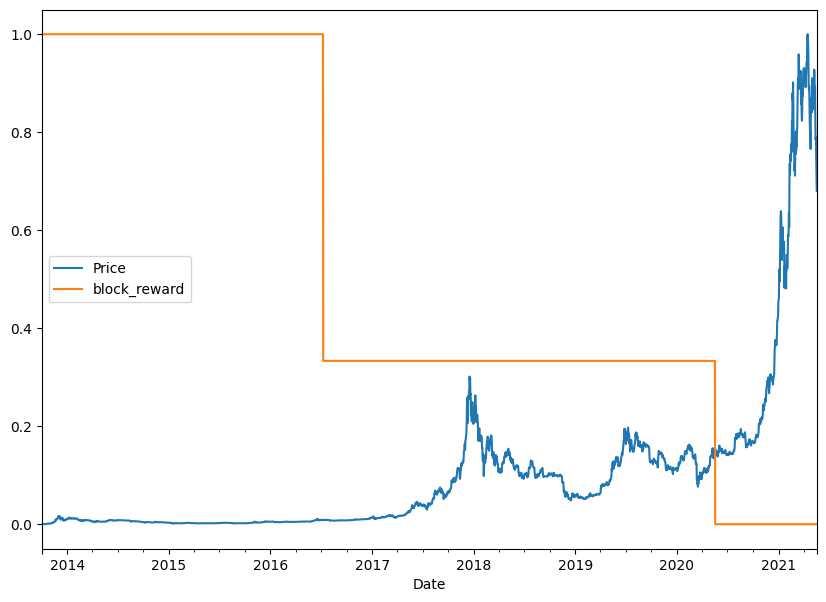

In [105]:
# Plot the block reward vc price over time
scaled_price_block_df = pd.DataFrame(minmax_scale(
    bitcoin_prices_block[['Price', 'block_reward']]), 
    columns=bitcoin_prices_block.columns, 
    index=bitcoin_prices_block.index
)
scaled_price_block_df.plot(figsize=(10, 7))

### Making a Windowed Dataset with Pandas

In [106]:
HORIZON = 1
WINDOW_SIZE = 7

In [107]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
    # Shift values for each step in WINDOW_SIZE
    bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed[
        'Price'
    ].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [108]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop('Price', axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [109]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [110]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (Multivariate Time Series)

In [111]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_6_dense_multivariate')

# Compile
model_6.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
14/18 [======================>.......] - ETA: 0s - loss: 1183.7053 

18/18 [==============================] - 2s 41ms/step - loss: 1037.8234 - val_loss: 2647.3599
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 401.3816

18/18 [==============================] - 1s 30ms/step - loss: 275.2695 - val_loss: 1080.6974
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 137.7165

18/18 [==============================] - 0s 28ms/step - loss: 199.5358 - val_loss: 1040.6847
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 239.9857

18/18 [==============================] - 1s 30ms/step - loss: 191.5022 - val_loss: 1030.3964
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 183.7897 - val_loss: 1037.3807
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 131.9011

18/18 [==============================] - 0s 27ms/step - loss: 177.8984 - val_loss: 988.1365
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 213.8143

18/18 [==============================] - 0s 28ms/step - loss: 172.4683 - val_loss: 976.1396
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 169.1236

18/18 [==============================] - 0s 28ms/step - loss: 169.1236 - val_loss: 933.7061
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 135.2305

18/18 [==============================] - 1s 29ms/step - loss: 167.5313 - val_loss: 926.3030
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 169.1785

18/18 [==============================] - 0s 28ms/step - loss: 162.1414 - val_loss: 898.4157
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 168.4507

18/18 [==============================] - 1s 30ms/step - loss: 157.5135 - val_loss: 882.2723
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 154.1483 - val_loss: 905.6312
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 154.7524 - val_loss: 884.1496
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 149.9367 - val_loss: 900.4371
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 161.5977

18/18 [==============================] - 0s 29ms/step - loss: 149.5260 - val_loss: 831.9659
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 132.1346

18/18 [==============================] - 0s 28ms/step - loss: 145.2115 - val_loss: 820.7430
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 143.9862 - val_loss: 862.8508
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 158.6718

18/18 [==============================] - 1s 47ms/step - loss: 145.7561 - val_loss: 813.3428
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 85.1052

18/18 [==============================] - 0s 28ms/step - loss: 139.8053 - val_loss: 801.4871
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 149.5461

18/18 [==============================] - 0s 28ms/step - loss: 138.1407 - val_loss: 758.6539
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 141.8351 - val_loss: 791.2963
Epoch 22/100
18/18 [==============================] - 0s 4ms/step - loss: 136.0466 - val_loss: 762.5023
Epoch 23/100
18/18 [==============================] - 0s 4ms/step - loss: 136.7627 - val_loss: 771.3459
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 156.9395

18/18 [==============================] - 1s 29ms/step - loss: 135.1979 - val_loss: 728.0164
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 134.3545

18/18 [==============================] - 1s 29ms/step - loss: 134.3545 - val_loss: 725.9501
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 139.7350 - val_loss: 746.5947
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 197.0526

18/18 [==============================] - 1s 36ms/step - loss: 134.1308 - val_loss: 701.4887
Epoch 28/100
18/18 [==============================] - 0s 7ms/step - loss: 129.4027 - val_loss: 729.4217
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 129.2930 - val_loss: 708.5883
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 133.8818 - val_loss: 705.6790
Epoch 31/100
18/18 [==============================] - 0s 7ms/step - loss: 131.9898 - val_loss: 779.5211
Epoch 32/100
16/18 [=========================>....] - ETA: 0s - loss: 127.4909

18/18 [==============================] - 1s 42ms/step - loss: 129.0980 - val_loss: 695.8063
Epoch 33/100
15/18 [========================>.....] - ETA: 0s - loss: 126.4543

18/18 [==============================] - 1s 42ms/step - loss: 125.5364 - val_loss: 686.4031
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 145.2061

18/18 [==============================] - 0s 28ms/step - loss: 125.2586 - val_loss: 665.4714
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 109.8088

18/18 [==============================] - 0s 28ms/step - loss: 122.5455 - val_loss: 659.6595
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 126.5993 - val_loss: 680.9618
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 158.0871

18/18 [==============================] - 0s 28ms/step - loss: 123.6356 - val_loss: 652.8677
Epoch 38/100
18/18 [==============================] - 0s 4ms/step - loss: 123.6292 - val_loss: 653.3005
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 139.0661

18/18 [==============================] - 0s 28ms/step - loss: 120.7271 - val_loss: 641.9976
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 111.9215

18/18 [==============================] - 0s 29ms/step - loss: 118.9118 - val_loss: 637.6464
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 119.2026 - val_loss: 639.7032
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 125.0961 - val_loss: 641.0522
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 119.1068 - val_loss: 681.2487
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 77.6307

18/18 [==============================] - 0s 29ms/step - loss: 118.9110 - val_loss: 623.8024
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 115.9076 - val_loss: 654.1497
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 99.8571

18/18 [==============================] - 0s 28ms/step - loss: 118.8664 - val_loss: 617.5941
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 118.8580 - val_loss: 775.4426
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 132.6965

18/18 [==============================] - 0s 29ms/step - loss: 116.8496 - val_loss: 614.0489
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 115.8827 - val_loss: 661.9194
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 127.7589 - val_loss: 782.6021
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 120.8016 - val_loss: 618.6906
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 117.7522 - val_loss: 619.4399
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 116.7586 - val_loss: 702.4404
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 126.4038 - val_loss: 689.1340
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 146.4775

18/18 [==============================] - 0s 28ms/step - loss: 115.3401 - val_loss: 599.2239
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 112.2015 - val_loss: 762.5135
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 130.3994 - val_loss: 692.7995
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 118.8697 - val_loss: 685.3213
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 114.2438

18/18 [==============================] - 1s 31ms/step - loss: 120.6590 - val_loss: 599.1690
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2990 - val_loss: 613.4185
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 140.5339

18/18 [==============================] - 0s 28ms/step - loss: 111.5972 - val_loss: 596.8745
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 79.5713

18/18 [==============================] - 0s 29ms/step - loss: 109.5368 - val_loss: 590.2809
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 111.9330 - val_loss: 608.0246
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 111.8338 - val_loss: 621.3858
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4184 - val_loss: 594.4233
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 116.2884

18/18 [==============================] - 0s 29ms/step - loss: 109.7901 - val_loss: 586.2350
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 108.3465 - val_loss: 660.1115
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 114.0814 - val_loss: 685.2822
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 127.9513 - val_loss: 631.2890
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 120.2772

18/18 [==============================] - 1s 49ms/step - loss: 132.4140 - val_loss: 584.4246
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 116.1179 - val_loss: 606.1833
Epoch 72/100
18/18 [==============================] - 0s 4ms/step - loss: 109.7733 - val_loss: 597.1962
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2196 - val_loss: 587.9153
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 161.7181

18/18 [==============================] - 1s 35ms/step - loss: 111.4437 - val_loss: 581.7379
Epoch 75/100
18/18 [==============================] - 0s 8ms/step - loss: 110.8234 - val_loss: 636.8691
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 115.0520 - val_loss: 606.8641
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 109.1699 - val_loss: 594.0702
Epoch 78/100
16/18 [=========================>....] - ETA: 0s - loss: 112.0227

18/18 [==============================] - 1s 41ms/step - loss: 110.8567 - val_loss: 575.6515
Epoch 79/100
18/18 [==============================] - 0s 7ms/step - loss: 108.4692 - val_loss: 586.2128
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 108.3748 - val_loss: 593.4033
Epoch 81/100
15/18 [========================>.....] - ETA: 0s - loss: 109.4525

18/18 [==============================] - 1s 42ms/step - loss: 108.2747 - val_loss: 572.4984
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 115.4782 - val_loss: 608.1993
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 117.8330 - val_loss: 623.3998
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 110.9339

18/18 [==============================] - 0s 28ms/step - loss: 113.1308 - val_loss: 572.2053
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 106.8255 - val_loss: 586.8690
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8544 - val_loss: 597.4939
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 107.2113 - val_loss: 591.7739
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8164 - val_loss: 579.6512
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 107.1857 - val_loss: 573.3506
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 108.1826 - val_loss: 624.4598
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 115.9386 - val_loss: 708.1154
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 110.7341 - val_loss: 581.6318
Epoch 93/100
 1/18 [>.............................] - ETA: 0s - loss: 109.24

18/18 [==============================] - 1s 29ms/step - loss: 113.1923 - val_loss: 571.5644
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 115.6580 - val_loss: 594.2933
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 141.7113

18/18 [==============================] - 0s 28ms/step - loss: 107.0006 - val_loss: 569.2398
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7842 - val_loss: 650.5084
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9122 - val_loss: 594.0001
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4361 - val_loss: 570.5537
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 148.5397

18/18 [==============================] - 1s 29ms/step - loss: 107.4260 - val_loss: 566.7185
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 115.5413 - val_loss: 685.1201


In [112]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 685.1199


685.1199340820312

In [113]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model('model_experiments/model_6_dense_multivariate')
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 566.7184


566.7183837890625

In [114]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8859.737, 8796.192, 9015.004, 8746.567, 8748.032, 8728.338,
       8673.1  , 8519.125, 8458.021, 8518.756], dtype=float32)>

In [115]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 566.7184,
 'mse': 1162389.1,
 'rmse': 1078.1415,
 'mape': 2.5365393,
 'mase': 0.99556726}

In [116]:
model_1_results

{'mae': 566.08484,
 'mse': 1157405.2,
 'rmse': 1075.8278,
 'mape': 2.5396178,
 'mase': 0.99445426}

## Model 7: N-BEATS Algorithm

- N-BEATS Paper: https://arxiv.org/abs/1905.10437

### Building and Testing the N-BEATS Block Layer

- **\*\*kwargs** takes care of all the arguments from the parent class (in this case, Layer class)

In [117]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, input_size: int,
                 theta_size: int,
                 horizon: int,
                 n_neurons: int,
                 n_layers: int,
                 **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        # Block contains stack of 4 fully connected layers
        # each has ReLU activation
        self.hidden = [tf.keras.layers.Dense(
            n_neurons, activation='relu') for _ in range(n_layers)]
        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(
            theta_size, activation='linear', name='theta')
    
    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        # Output the backcast and the forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

In [118]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [119]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [120]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer
print(f'Backcast: {tf.squeeze(backcast.numpy())}')
print(f'Forecast: {tf.squeeze(forecast.numpy())}')

Backcast: [ 0.020612   -0.27757582 -0.31310484  0.08825732 -0.1636158   0.34224683
 -0.04487193]
Forecast: -0.47194904088974


### Preparing Data for the N-BEATS Algorithm Using `tf.data`

In [121]:
HORIZON = 1
WINDOW_SIZE = 7

In [122]:
# Create N-BEATS data inputs (B-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [123]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f'Price+{i+1}'] = bitcoin_prices_nbeats[
                                    'Price'].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [124]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop('Price', axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [125]:
# Making the dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip(
    (train_features_dataset, train_labels_dataset)
)
test_dataset = tf.data.Dataset.zip(
    (test_features_dataset, test_labels_dataset)
)

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting Up Hyperparameters for N-BEATS Algorithm

In [126]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting Ready for Residual Connections

In [127]:
# Make tensor
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f'Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}')
print(f'Subtracted: {subtracted.numpy()}')
print(f'Added: {added.numpy()}')

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, Compiling and Fitting the N-BEATS Algorithm

In [128]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name='InitialBlock')

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name='stack_input')

# 3. Create initial backcast and forecast input
# (backwards prediction and horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
# First stack is already created in step 3
for i, _ in enumerate(range(N_STACKS-1)):
    # 5. Use the NBeats to calculate the backcast as well as the forecast
    backcast, block_forecast = NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f'NBeatsBlock_{i}'
    )(residuals)

    # 6. Create the double residual stacking
    residuals = layers.subtract([residuals, backcast], name=f'subtract_{i}')
    forcast = layers.add([forecast, block_forecast], name=f'add_{i}')

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name='model_7_nbeats')

# 8. Compile the model with MAE loss
model_7.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=200,
                restore_best_weights=True
            ),
            tf.keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                patience=100,
                verbose=1
            )])


Epoch 737: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1207: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1307: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 45.2 s, sys: 2.9 s, total: 48.1 s
Wall time: 51.3 s


In [129]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 12ms/step - loss: 573.6252


573.625244140625

In [130]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 0s 58ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8833.152, 8756.608, 9029.263, 8755.637, 8747.483, 8745.371,
       8646.268, 8500.724, 8463.765, 8502.553], dtype=float32)>

In [131]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 573.62524,
 'mse': 1155321.9,
 'rmse': 1074.859,
 'mape': 2.5965555,
 'mase': 1.0077007}

In [132]:
model_1_results

{'mae': 566.08484,
 'mse': 1157405.2,
 'rmse': 1075.8278,
 'mape': 2.5396178,
 'mase': 0.99445426}

### Plotting the N-BEATS Architecture

In [133]:
from keras.utils import plot_model

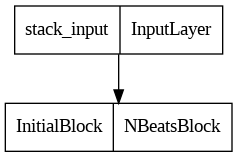

In [134]:
plot_model(model_7)

## Model 8: Creating an Ensemble (Stacking Different Models Together)

In [135]:
HORIZON, WINDOW_SIZE

(1, 7)

### Construct, Fitting and Ensemble of Models

In [136]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=['mae', 'mse', 'mape']):
    """
    Returns a list of num_iter models each trained on
    MAE, MSE and MAPE loss.

    For example, if num_iter=10, a list of 30 trained models
    will be returned: 10 * len(['MAE', 'MSE', 'MAPE'])
    """
    # Make empty list for trained ensemble models
    ensemble_models = []

    # Create num_iter number of models per loss function
    for i in range(num_iter):
        # Build and fit a new model with a different loss function
        for loss_function in loss_fns:
            print(f"""Optimizing model by reducing: 
                {loss_function} for {num_epochs} epochs, model number: {i}
            """)

            # Construct a simple model
            model = tf.keras.Sequential([
                # Initialize dense layers with normal distribution for 
                # estimating prediction intervals later on
                layers.Dense(128, kernel_initializer='he_normal', 
                             activation='relu'),
                layers.Dense(128, kernel_initializer='he_normal',
                             activation='relu'),
                layers.Dense(HORIZON)
            ])

            # Compile simple model with current loss function
            model.compile(loss=loss_function,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae', 'mse'])
            
            # Fit the current model
            model.fit(train_data,
                      epochs=num_epochs,
                      verbose=0,
                      validation_data=test_data,
                      callbacks=[tf.keras.callbacks.EarlyStopping(
                          monitor='val_loss',
                          patience=200,
                          restore_best_weights=True
                      ),
                      tf.keras.callbacks.ReduceLROnPlateau(
                          monitor='val_loss',
                          patience=100,
                          verbose=1
                      )])
            
            # Append fitted model to list of ensemble models
            ensemble_models.append(model)

    return ensemble_models

In [137]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: 
                mae for 1000 epochs, model number: 0
            

Epoch 213: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: 
                mse for 1000 epochs, model number: 0
            

Epoch 980: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: 
                mape for 1000 epochs, model number: 0
            

Epoch 278: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 378: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: 
                mae for 1000 epochs, model number: 1
            

Epoch 510: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 610: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: 
                mse for 1000 epochs, model number: 1
            

Epoch 313: ReduceLROnPlateau redu

In [138]:
len(ensemble_models)

15

### Making Predictions with the Ensemble Model

In [139]:
# Create a function witch uses a list of trained models 
# to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
    ensemble_preds = []
    for model in ensemble_models:
        preds = model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))

In [140]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 38ms/step
CPU times: user 717 ms, sys: 16.9 ms, total: 734 ms
Wall time: 827 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8790.924,  8779.542,  9088.458, ..., 50319.11 , 48606.56 ,
        45338.484],
       [ 8731.02 ,  8746.131,  9068.601, ..., 49918.297, 48025.914,
        45892.438],
       [ 8751.272,  8741.661,  9048.944, ..., 49701.227, 47519.58 ,
        45484.63 ],
       ...,
       [ 8804.281,  8793.207,  9058.877, ..., 50081.43 , 48215.28 ,
        46112.555],
       [ 8726.895,  8767.381,  9080.264, ..., 49228.785, 48378.832,
        45258.57 ],
       [ 8797.488,  8781.215,  9050.87 , ..., 50223.164, 48710.156,
        46465.92 ]], dtype=float32)>

In [141]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8787.63  , 8773.997 , 9058.1045, 8721.964 , 8742.244 , 8722.176 ,
       8660.231 , 8481.257 , 8451.194 , 8518.896 ], dtype=float32)>

In [142]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 565.9145,
 'mse': 1136866.2,
 'rmse': 1066.2393,
 'mape': 2.5738153,
 'mase': 0.994155}

In [143]:
model_1_results

{'mae': 566.08484,
 'mse': 1157405.2,
 'rmse': 1075.8278,
 'mape': 2.5396178,
 'mase': 0.99445426}

### Plotting the Prediciton Intervals of the Ensemble

- Getting 95% confidence prediction intervals:

1. Take the predictions from a number of randomly initialized models
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, **95% of observations fall within 1.96 standard deviations of the mean**)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

In [144]:
# Find the upper and lower bounds of ensemble predictions
# 1. Take the predictions from randomly initialized models
def get_upper_lower(preds):
    # 2. Measure the standard deviation of the predictions
    std = tf.math.reduce_std(preds, axis=0)

    # 3. Multiply the standard deviation by 1.96
    interval = 1.96 * std

    # 4. Get the prediction interval upper and lower bounds
    preds_mean = tf.reduce_mean(preds, axis=0)
    lower, upper = preds_mean - interval, preds_mean + interval

    return lower, upper

In [145]:
# Get the upper and lower bounds of the 95% prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)

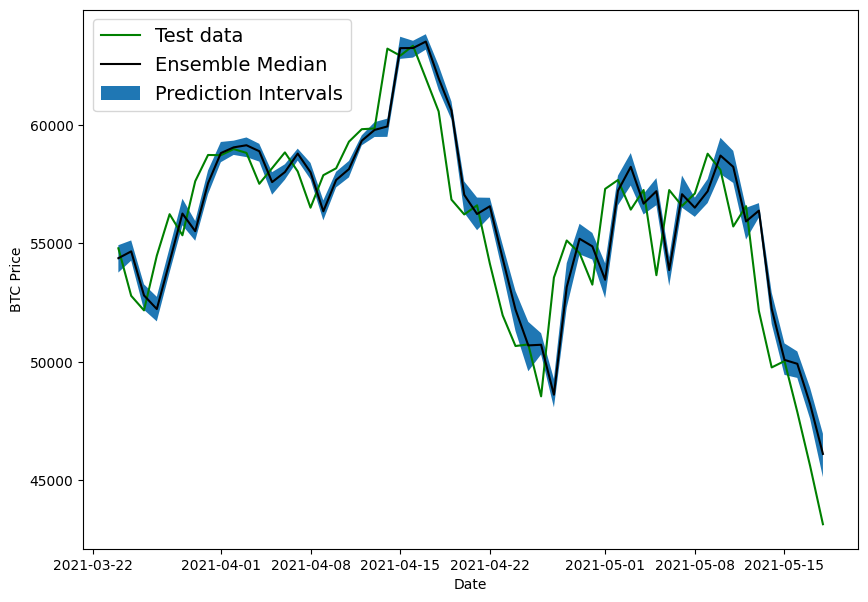

In [146]:
# Get the median/mean values of the ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of the ensemble preds along with the prediction intervals
offset = 500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], 'g', label='Test data')
plt.plot(X_test.index[offset:], ensemble_median[offset:], 'k-', 
         label='Ensemble Median')
plt.xlabel('Date')
plt.ylabel("BTC Price")
# To plot the upper bound, use fill between
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label='Prediction Intervals')
plt.legend(loc='upper left', fontsize=14)

## Model 9: Train a Model on the Full Historical Data to Make Predictions Into the Future

In [147]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [148]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(['Price', 'block_reward'], 
                                              axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [149]:
# Turn data into efficient running tensors
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [150]:
tf.random.set_seed(42)

# Create model
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON),
], name='model_9_future_model')

# Compile the model
model_9.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make Predictions Into the Future

In [151]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14

In [152]:
# Create a function to make predictions into the future
def make_future_forecasts(values, model, into_future, 
                          window_size=WINDOW_SIZE) -> list:
    """
    Make future forecasts into_future steps after values ends.

    Returns future forecasts as a list of floats.
    """
    # 2. Create an empty list for future forecasts/prepare data to forecasts on
    future_forecasts = []
    last_window = values[-WINDOW_SIZE:]

    # 3. Make INTO_FUTURE number of predictions, altering the data which
    # gets predicted on each
    for _ in range(INTO_FUTURE):
        # Predict on the last window, then append it again, again, again
        future_pred = model.predict(tf.expand_dims(last_window, axis=0))
        print(f'Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy}\n')

        # Append predictions to future_forecast
        future_forecasts.append(tf.squeeze(future_pred).numpy())

        # Update last window with new pred and get WINDOW_SIZE most recent preds
        last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

In [153]:
# Make forecasts into the future
future_forecasts = make_future_forecasts(values=y_all,
                                         model=model_9,
                                         into_future=INTO_FUTURE,
                                         window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 68ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=56362.492>>

1/1 [==============================] - 0s 19ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 56362.4921875 ] -> Prediction: <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=51614.86>>

1/1 [==============================] - 0s 20ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 56362.4921875  51614.859375  ] -> Prediction: <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=49800.55>>

1/1 [==============================] - 0s 20ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 56362.49218

In [154]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


### Plotting Future Forecasts

In [155]:
def get_future_dates(start_date, into_future, offset=1):
    """
    Returns array of datetime values ranging from start_date to
    start_date+into_future
    """
    start_date = start_date + np.timedelta64(offset, 'D')
    end_date = start_date + np.timedelta64(into_future, 'D')
    return np.arange(start_date, end_date, dtype='datetime64[D]')

In [156]:
# Last timestep of timesteps
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [157]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [158]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecasts = np.insert(future_forecasts, 0, btc_price[-1])
next_time_steps, future_forecasts

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.4712908603, None], dtype=object))

In [159]:
# # Plot future prices predictions of Bitcoin
# plt.figure(figsize=(10, 7))
# plot_time_series(bitcoin_prices.index, btc_price, start=2500,
#                  format='-', label='Actual BTC Price')
# plot_time_series(next_time_steps, future_forecasts, format="-", 
#                  label="Predicted BTC Price")

## Model 10: The Turkey Problem

In [160]:
# Introducing a turkey problem to the BTC data
# (the price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [161]:
# Manufacture an extra price on the end
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [162]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

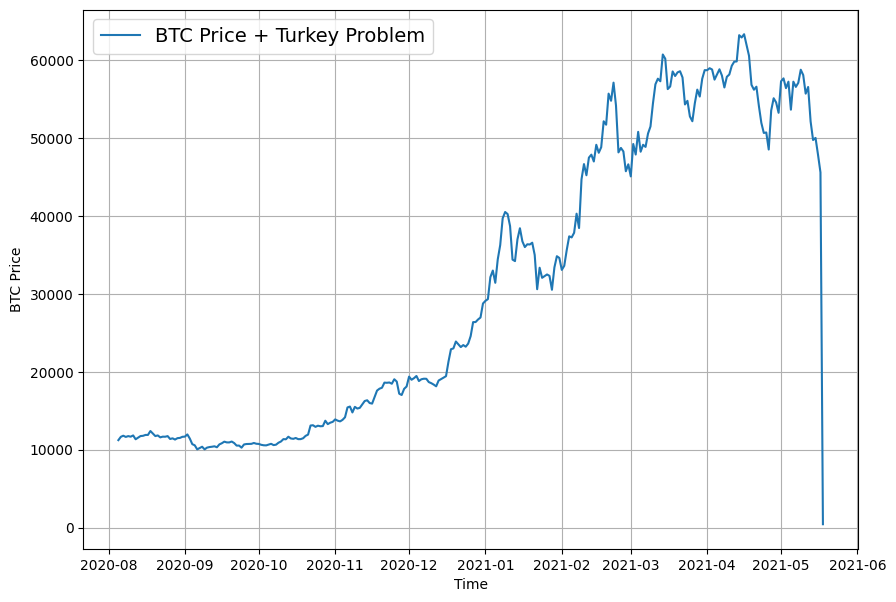

In [163]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format='-',
                 label='BTC Price + Turkey Problem',
                 start=2500)

In [164]:
# Create train and test sets fot turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey),
                                         window_size=WINDOW_SIZE,
                                         horizon=HORIZON)
X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, 
                                                          full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2224, 556, 2224, 556)

### Building A Turkey Model

In [165]:
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = 'Turkey_Model'

turkey_model.compile(loss='mae',
                     optimizer=tf.keras.optimizers.Adam())

turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [166]:
# Load in best model and evaluate it
turkey_model = tf.keras.models.load_model('model_experiments/Turkey_Model/')
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 639.5234


639.5233764648438

In [167]:
# Making predictions
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8871.854 , 8796.316 , 9049.754 , 8812.615 , 8757.967 , 8734.142 ,
       8713.738 , 8535.476 , 8472.911 , 8545.4795], dtype=float32)>

In [168]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17137.85,
 'mse': 614990340.0,
 'rmse': 23729.814,
 'mape': 121.48546,
 'mase': 26.520878}

In [169]:
model_1_results

{'mae': 566.08484,
 'mse': 1157405.2,
 'rmse': 1075.8278,
 'mape': 2.5396178,
 'mase': 0.99445426}

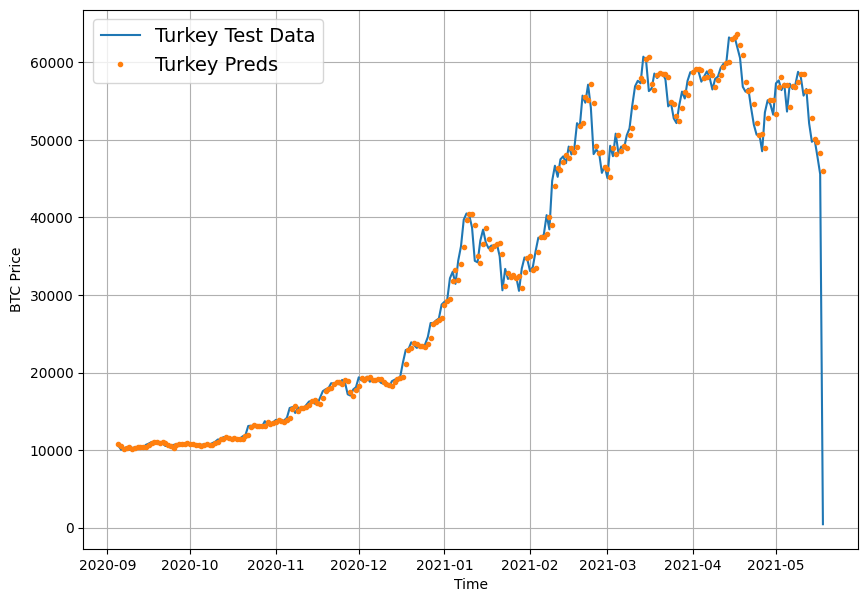

In [170]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], 
                 values=btc_price_turkey[-len(y_test):], 
                 format="-", 
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds, 
                 label="Turkey Preds", 
                 start=offset);

## Compare Models

In [173]:
# Compare different model results
# (w = window, h = horizon)
model_results = pd.DataFrame({
    'naive_model': naive_results,
    'model_1_dense_w7_h1': model_1_results,
    'model_2_dense_w30_h1': model_2_results,
    'model_3_dense_w30_h7': model_3_results,
    'model_4_CONV1D': model_4_results,
    'model_5_LSTM': model_5_results,
    'model_6_multivariate': model_6_results,
    'model_7_NBEATS': model_7_results,
    'model_8_ensemble': ensemble_results,
    'model_10_turkey': turkey_results
}).T
model_results

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,566.084839,1.157405e+06,1075.827759,2.539618,0.994454
model_2_dense_w30_h1,600.594666,1.267467e+06,1125.818359,2.714862,1.049845
model_3_dense_w30_h7,641.998596,1.394568e+06,663.467102,2.902817,1.122220
model_4_CONV1D,569.965088,1.179679e+06,1086.130371,2.559159,1.001271
model_5_LSTM,566.559387,1.162852e+06,1078.355957,2.536454,0.995288
model_6_multivariate,566.718384,1.162389e+06,1078.141479,2.536539,0.995567
model_7_NBEATS,573.625244,1.155322e+06,1074.859009,2.596555,1.007701
model_8_ensemble,565.914490,1.136866e+06,1066.239258,2.573815,0.994155
model_10_turkey,17137.849609,6.149903e+08,23729.814453,121.485458,26.520878


<Axes: >

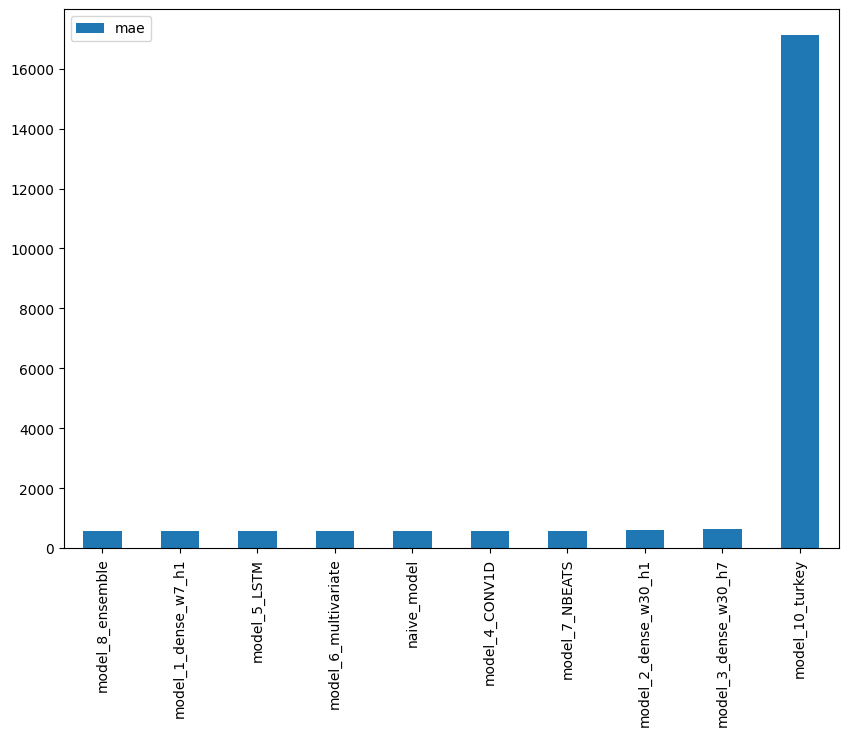

In [174]:
# Sort model results by MAE and plot them
model_results[['mae']].sort_values(by='mae').plot(figsize=(10, 7), kind='bar')